In [ ]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/grenders95/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


# Sentiment Scoring Using SentiWordNet


In [3]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [4]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [5]:
reviews = pd.read_csv('../data/balanced_corpus.csv')

In [6]:
reviews.shape

(2500, 9)

In [7]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6M441DQ7HL09,B0009RHAT8,"Mike ""Humans are people too.""","[6, 11]","I've two of these stands. On one of them, the base part of the tubing has lost its tack weld. If you carefully separate the pie slice shaped black foam from the base of the stand, you'll see that the base of the tubing is welded there. Mine lost its weld, so the tubing is not secure to the grey base - they separate - I was left holding the tubing while the grey base fell to the floor!UPDATE: 1/9/12 GLEN INGLES REFUSES TO REPLACE OR REPAIR THE STAND. BEWARE! ...and you should be aware that the stand is assembled in..............wait for it................China. That may explain why it failed, but Glen Ingles could have offered to replace it. I guess he doesn't want me to buy any more of his products, or refer others to his products. Well, that's his policy. That's okay, he's got competition, and I'll be purchasing from them instead.",1,BEWARE! Chinese stand FELL APART! - Ingles says I'm SOL,1325894400,"01 7, 2012"
1,AYTKUTAP0VA53,B003VWJ2K8,Yakov Hadash,"[2, 2]","Like the other one star reviewers -- my problem is that the head broke off. I tried to glue it back on, but it just fell apart even worse when I tried to do that. If you buy this, you really need to baby it! My advice is look for a more sturdy model!",1,Broken head,1388534400,"01 1, 2014"
2,A3IY9JZZ36OQSV,B009ZX8ZJG,lee cardwell,"[0, 0]",This thing is crap right out of the box it had holes in the stitching and all the pockets were sown on crooked. What can you expect for $20 tho. This was a temporary solution I don't recommend this for long term use it will probably fall apart.,1,Don't wast your money,1398729600,"04 29, 2014"
3,A3DAURGJAL0Y0S,B001PGXKC8,"Marc LaBelle ""NevermoreFU""","[0, 0]","I thought it was my jack for a while, then I noticed it wouldn't stay in any pedal. There is no ""click"" assuring that the cable is in place... and there's a reason for that, it isn't! Slips right out of every pedal I have. Not reliable.",1,Plug slips right out of any jack,1380758400,"10 3, 2013"
4,A2TSUJLFHB61W3,B000TGHVGQ,kgbak,"[1, 1]","I just got this and I've noticed that it when I activate the pedal it sucks almost all of the bottom end out of my tone... I have a crybaby that doesn't have the range the 847 does but its 10x's more transparent. There may be other factors at play here as it is new, but the lesson is: try it before you just buy it to make sure it works for you.",1,tone issues,1383091200,"10 30, 2013"


In [8]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [9]:
reviews.shape

(2500, 9)

In [16]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [17]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
2276,Since they are light strings they are easier to press down and easier to bend which really helps me because I'm a beginner and don't have much Calais yet. Also I like the first day of new strings look Shiny! I would recommend this to any beginner.,4.656863
898,I bought this to connect a Technics TT with an Audio Technica cartridge to my newer Onkyo receiver with no phono input. The unit did work but I had to turn the volume to 80 (out of 100) to get any reasonable volume. In addition I have an Onkyo M3040 connected to the receiver that I use for as a zone 2 amplifier. With this preamp I am getting some serious spikes into the amp. They are not audible but the lights would dim and the volume from the zone 2 speakers would drop. I do not have this problem with any other source so it appears to be some signal from this preamp.This unit may work perfectly fine with a Behringer mixer but for my use it doesn't meet my needs at all. I am returning it.,0.792254


In [18]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
2174,30 feet of cable for what I paid for a 10 footer from my local guitar shop.I highly recommend!,3.125000
617,"I purchased this stand for my electric guitar and used it for a couple of weeks before the weak weld broke on the neck holder at the top when I placed my guitar in it. Upon close inspection, the weld was very poor and barely attached the neck holder to the upright tube. The tubing is made from very thin round steel tubing that is maybe .025&#34; wall, so don't expect it to take much abuse before it snaps off- even if it is welded better than mine was. Just folding the legs repeatedly back and forth will likely cause it to break or pop out one of light duty aluminum rivets on the legs- it is literally that thin of metal tubing.For $10-11 I did not expect perfection, so to it's credit- it is foam covered where it needs to be and has never scratched my guitars.This stand does have one other good quality- it is CHEAP! Since it was less that $11, I cannot see going through the hassle of returning it. I was able to carefully weld mine back together- but this would probably not be an option for most. The stand might work fine if you don't fold it up regularly and if you leave it set up- but If you need portability and durability- I would definitely purchase a better quality stand.",-0.565844


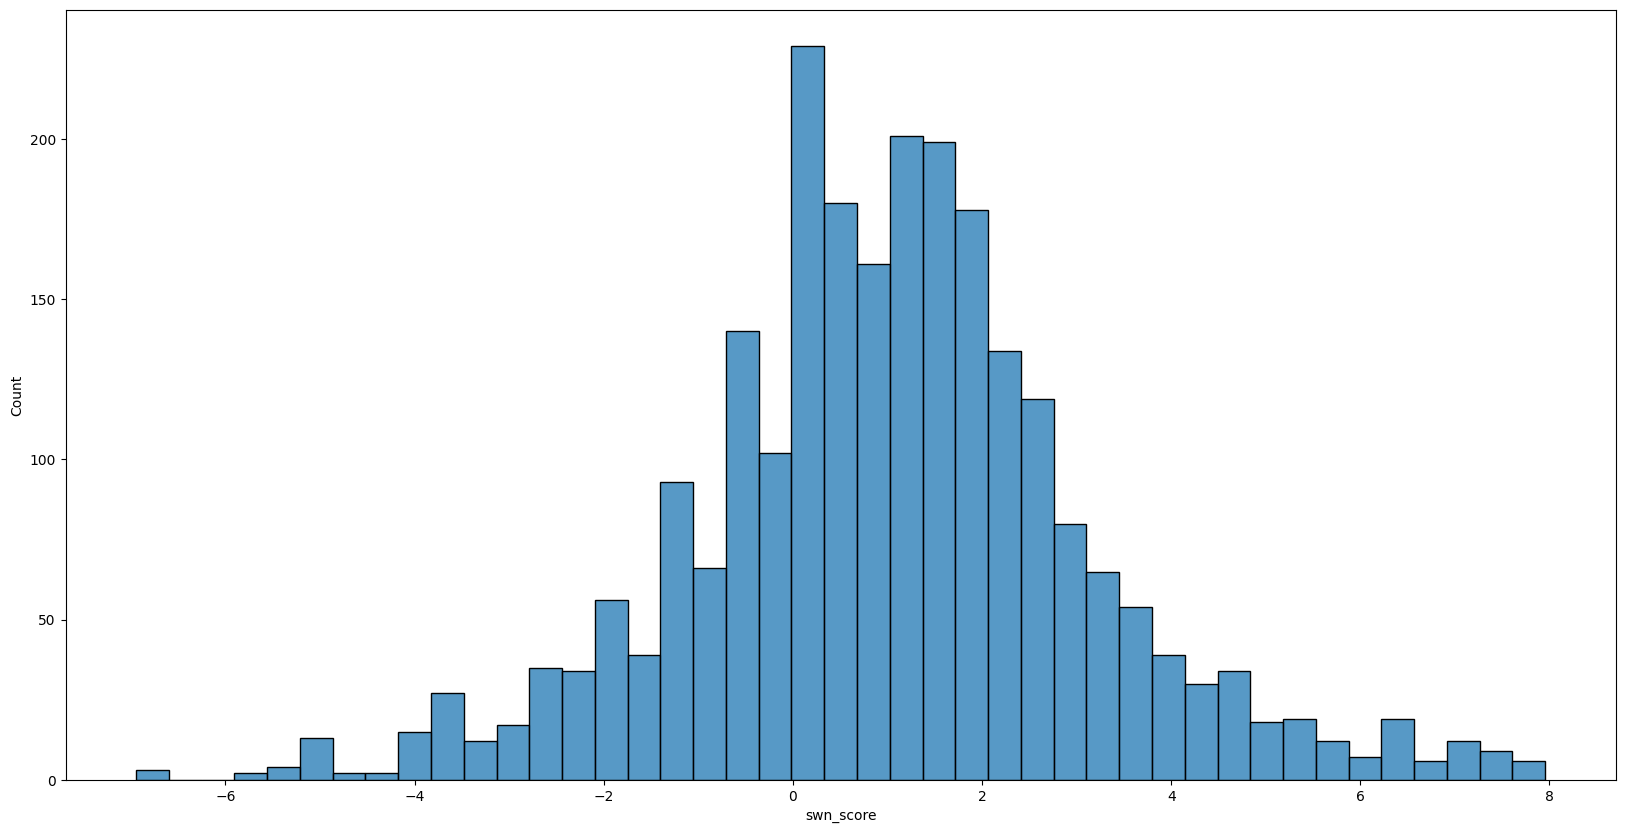

In [19]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [20]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [21]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    1278
negative     981
neutral      241
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

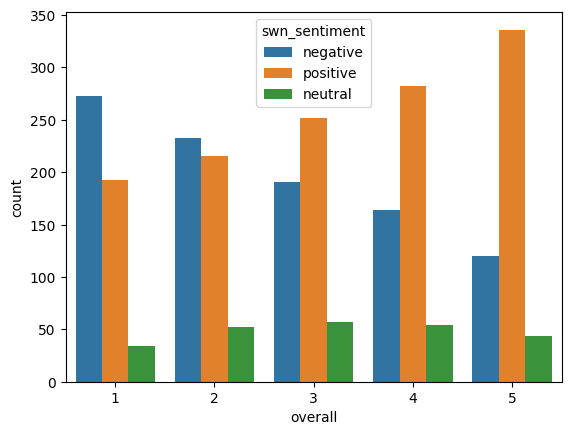

In [22]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<Axes: xlabel='swn_sentiment', ylabel='overall'>

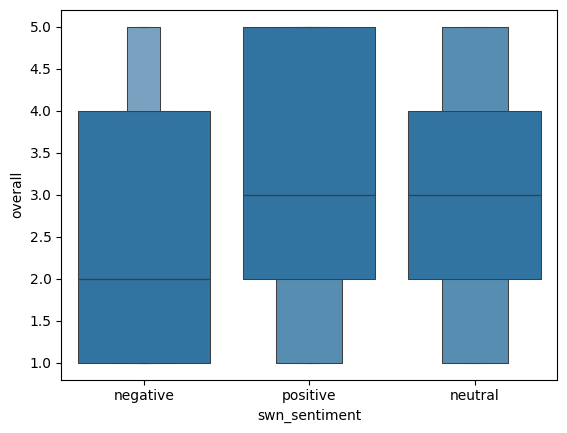

In [23]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

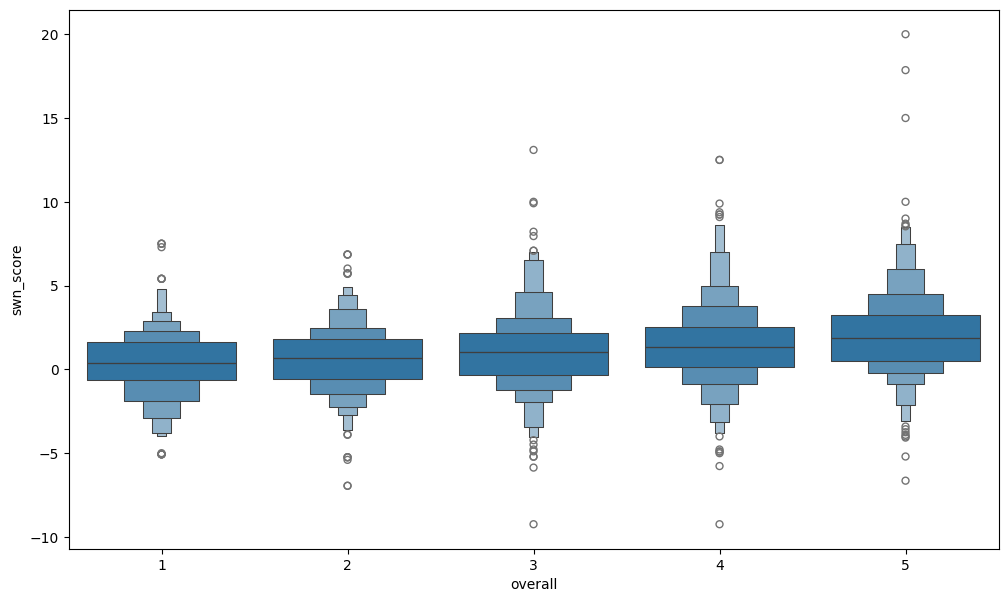

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [25]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [26]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [27]:
len(y_swn_pred), len(y_true)

(2500, 2500)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

Text(104.7222222222223, 0.5, 'True')

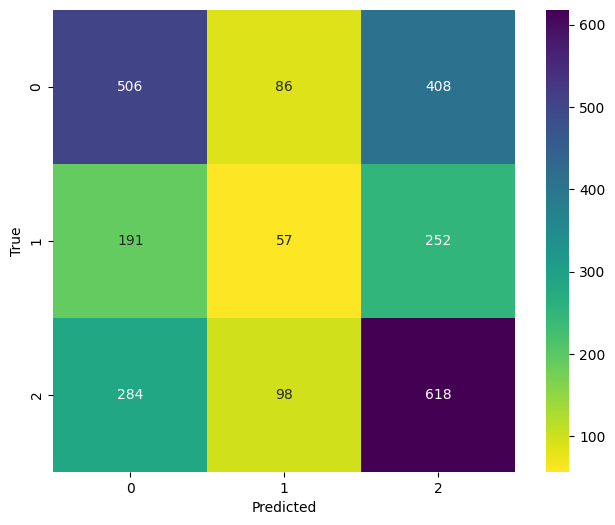

In [32]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Performance Assesment

## Negative Sentiment Prediction Assessment

In [33]:
tp, tn, fp, fn = 506, 57+252+98+618, 86+408, 191+547

In [35]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [36]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.4067524115755627
precission: 0.506
f1 score: 0.45098039215686275


## Positive Sentiment Prediction Assessment

In [37]:
tp, tn, fp, fn = 618, 506+86+57+191, 252+408, 98+284

In [38]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [39]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.618
precission: 0.4835680751173709
f1 score: 0.5425812115891132


# Sentiment Scoring Model Using NLTK Opinion Lexicon

In [40]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [42]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())


In [43]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [44]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

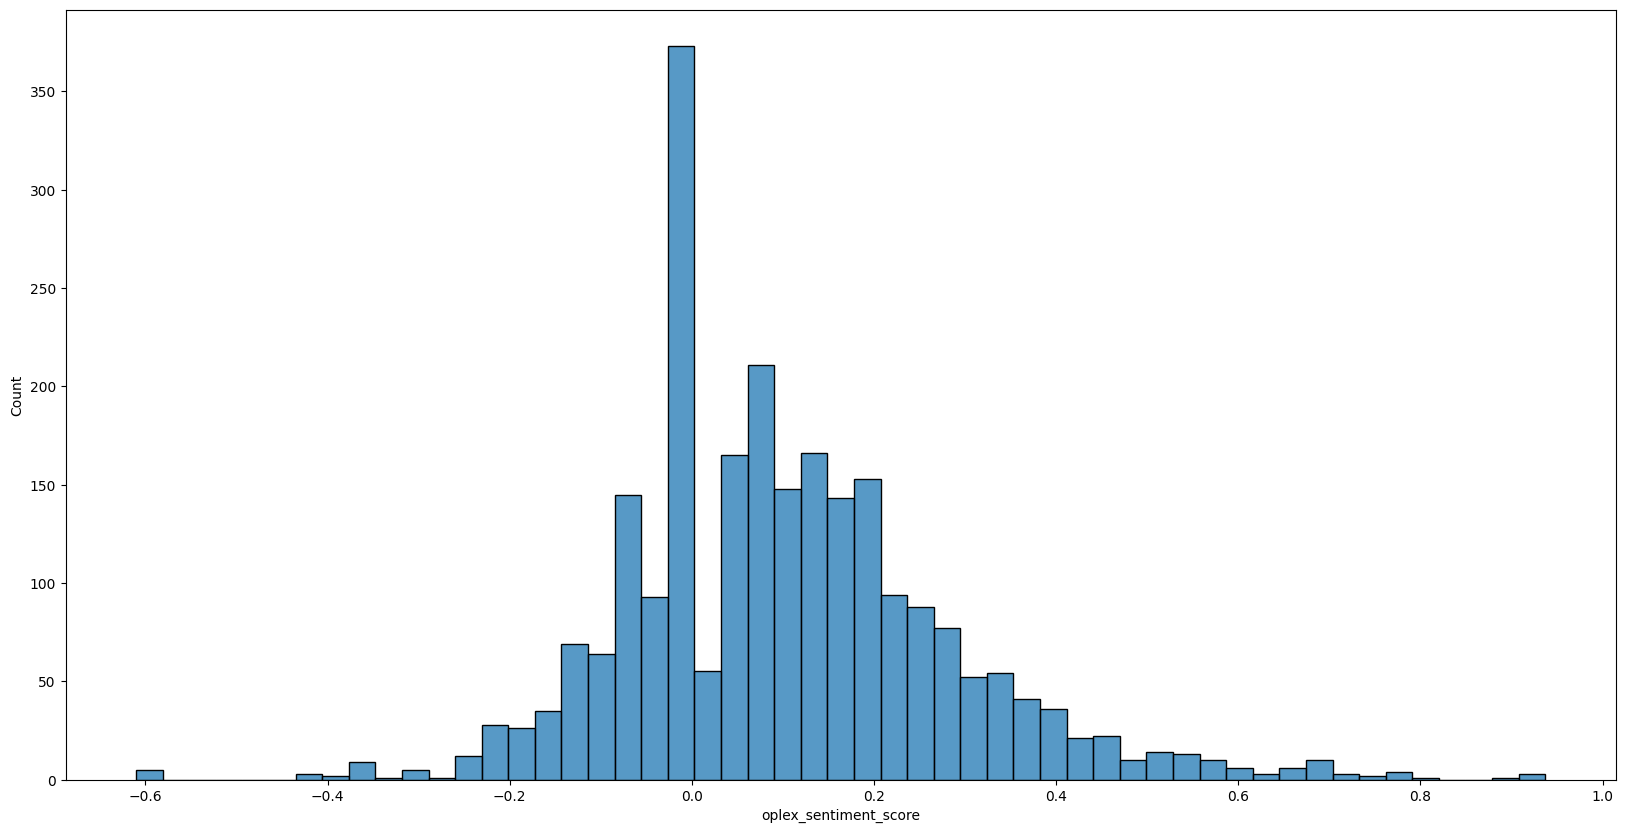

In [45]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [46]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [47]:
reviews['oplex_sentiment'].value_counts(dropna=False)

oplex_sentiment
positive    1126
neutral      856
negative     518
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

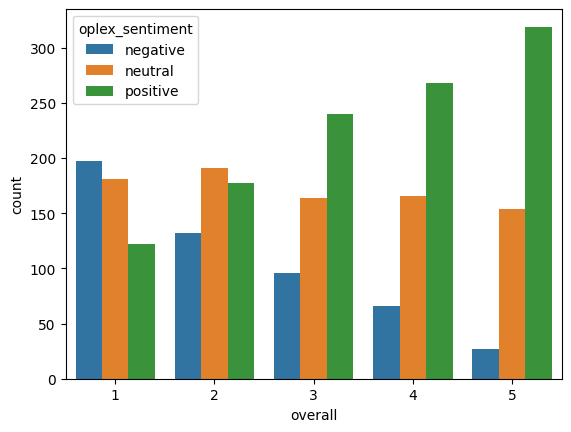

In [48]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<Axes: xlabel='oplex_sentiment', ylabel='overall'>

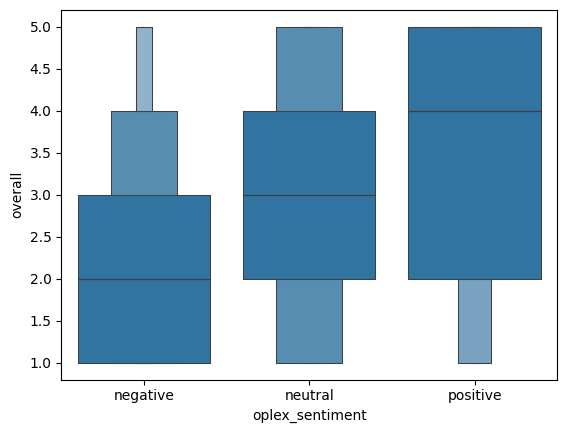

In [49]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

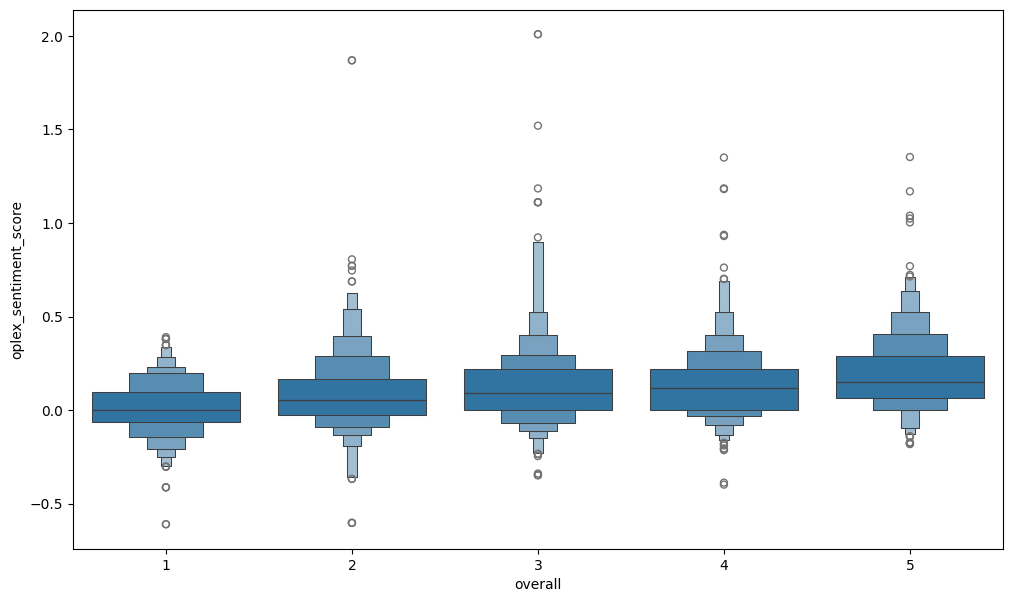

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()


In [51]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [52]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

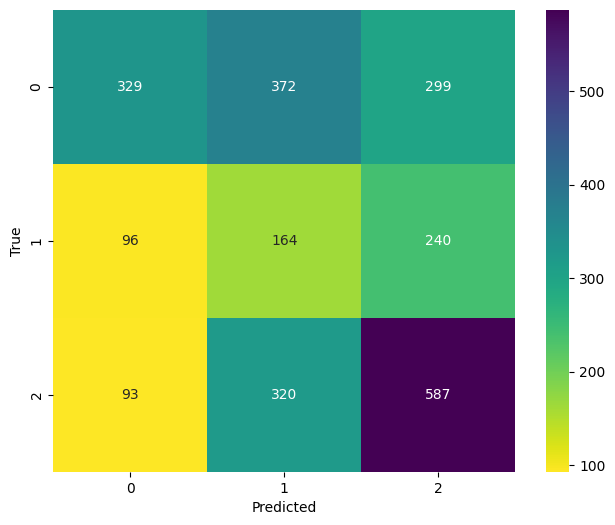

In [53]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [54]:
oplex_cm = list(oplex_cm.ravel())

In [55]:
oplex_cm

[np.int64(329),
 np.int64(372),
 np.int64(299),
 np.int64(96),
 np.int64(164),
 np.int64(240),
 np.int64(93),
 np.int64(320),
 np.int64(587)]

## Negative Label Assessment

In [56]:
tp, tn, fp, fn = 329, 164+240+320+587, 96+93, 372+299

In [57]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.329
precission: 0.6351351351351351
f1 score: 0.43346508563899866


## Positive Label Assessment

In [58]:
tp, tn, fp, fn = 587, 329+372+96+164, 299+240, 93+320

In [59]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.587
precission: 0.5213143872113677
f1 score: 0.5522107243650047
